# **Detección de fraude con tarjeta de crédito con árboles de decisión y SVM**


<div id="Introduccion">
    <h2>Introducción</h2>
    <br>Imagina que trabajas para una institución financiera y que parte de tu trabajo consiste en construir un modelo que prediga si una transacción con tarjeta de crédito es fraudulenta o no. Puedes plantear el problema como uno de clasificación binaria. Una transacción pertenece a la clase positiva (1) si es fraudulenta; de lo contrario, pertenece a la clase negativa (0).
    <br>
    <br>Tienes acceso a transacciones que ocurrieron durante un cierto período de tiempo. La mayoría de las transacciones suelen ser legítimas y solo una pequeña fracción no lo son. Por lo tanto, normalmente se dispone de un conjunto de datos muy desbalanceado. Este es también el caso del conjunto de datos actual: solo 492 transacciones de un total de 284,807 son fraudulentas (la clase positiva —los fraudes— representa el 0.172% de todas las transacciones).
    <br>
    <br>Este es un conjunto de datos de Kaggle. Puedes encontrar el dataset "Detección de Fraude con Tarjetas de Crédito" en el siguiente enlace: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Detección de Fraude con Tarjetas de Crédito</trada
    <br>
</div>


Importamos las bibliotecas necesarias.


In [33]:

# Importamos las librerías necesarias para este laboratorio

import pandas as pd  # Librería para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Librería para crear gráficos

from sklearn.model_selection import train_test_split  # Para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.preprocessing import normalize, StandardScaler  # Para normalizar y escalar los datos
from sklearn.utils.class_weight import compute_sample_weight  # Para manejar el desbalance de clases asignando pesos
from sklearn.tree import DecisionTreeClassifier  # Clasificador basado en árboles de decisión
from sklearn.metrics import roc_auc_score  # Métrica para evaluar el rendimiento del modelo (AUC-ROC)
from sklearn.svm import LinearSVC  # Clasificador de soporte vectorial lineal

import warnings  # Librería para manejar advertencias


## Carga del conjunto de datos

Ejecuta la celda a continuación para cargar el conjunto de datos en la variable raw_data. El código obtendrá el conjunto de datos desde la URL y lo cargará en dicha variable. Se generará una vista previa del conjunto de datos como salida.


In [34]:

# Descargar el conjunto de datos desde la URL especificada
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# Leer los datos desde la URL y cargarlos en la variable 'raw_data' como un DataFrame de pandas
raw_data = pd.read_csv(url)

raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<div id="dataset_analysis">
    <h2>Análisis del dataset</h2>
</div>


Cada fila del conjunto de datos representa una transacción con tarjeta de crédito. Como se muestra arriba, cada fila tiene 31 variables. Una de ellas (la última variable en la tabla) se llama Class y representa la variable objetivo.

Nuestro objetivo será entrenar un modelo que utilice las demás variables para predecir el valor de la variable Class. Class es la variable objetivo y toma dos valores: 1 en caso de fraude y 0 en caso contrario.

Nota: Por razones de confidencialidad, los nombres originales de la mayoría de las características han sido anonimizados como V1, V2 ... V28.

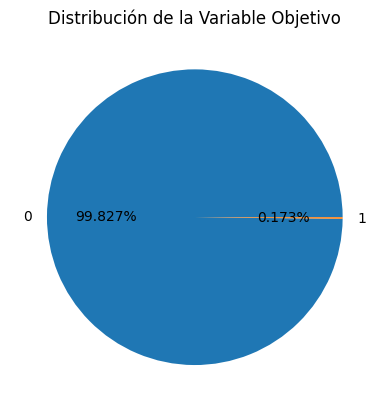

In [35]:

# Obtener el conjunto de clases distintas presentes en la variable 'Class'
labels = raw_data.Class.unique()

# Obtener el número de ocurrencias de cada clase (0: no fraude, 1: fraude)
sizes = raw_data.Class.value_counts().values

# Crear una figura y un eje para el gráfico circular
fig, ax = plt.subplots()

# Dibujar el gráfico circular con los tamaños y etiquetas correspondientes
ax.pie(sizes, labels=labels, autopct='%1.3f%%')


# Establecer el título del gráfico
ax.set_title('Distribución de la Variable Objetivo')

# Mostrar el gráfico
plt.show()


Como se muestra arriba, la variable Class tiene dos valores: 0 (la transacción con tarjeta de crédito es legítima) y 1 (la transacción con tarjeta de crédito es fraudulenta). Por lo tanto, necesitas modelar un problema de clasificación binaria.

Además, el conjunto de datos está muy desbalanceado, es decir, las clases de la variable objetivo no están representadas de forma equitativa. Este caso requiere una atención especial al momento de entrenar el modelo o al evaluar su calidad.

Una forma de abordar este caso durante el entrenamiento es sesgar el modelo para que preste más atención a las muestras de la clase minoritaria. Los modelos que se estudiarán en este análisis estarán configurados para tener en cuenta los pesos de las clases de las muestras durante el entrenamiento (fit).


También es recomendable entender cómo afectan las distintas características al modelo. Podemos visualizar el efecto de las diferentes características utilizando el siguiente código.


<Axes: >

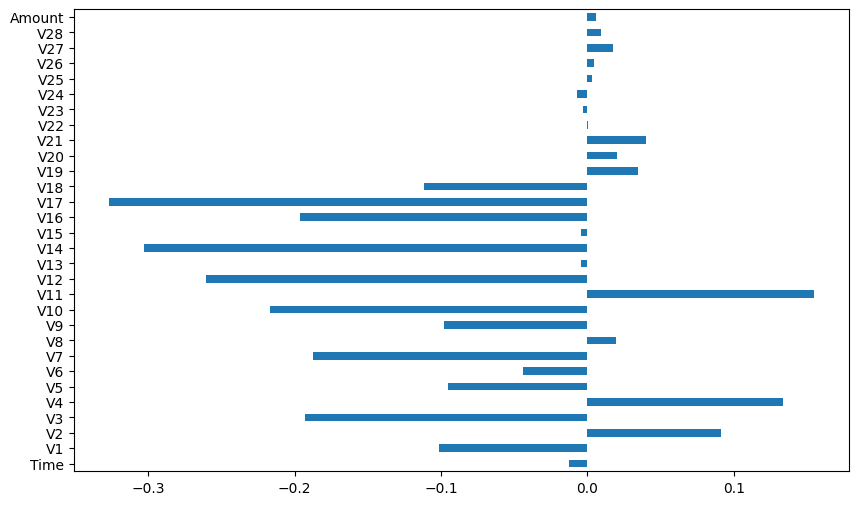

In [36]:
# Calcular los valores de correlación entre las variables y la variable 'Class', excluyendo 'Class' de los resultados
correlation_values = raw_data.corr()['Class'].drop('Class')

# Graficar las correlaciones como un gráfico de barras horizontales
correlation_values.plot(kind='barh', figsize=(10, 6))


Esto muestra claramente que algunas características afectan más que otras al valor de la variable Class. Para un modelado eficiente, podemos utilizar únicamente las características más correlacionadas.


<div id="dataset_preprocessing">
    <h2>Preprocesamiento del Dataset</h2>
</div>


Ahora, vamos a preparar los datos para el entrenamiento. Primero, vamos a realizar un escalado estándar a las características de entrada y las normalizaremos usando la norma  $L_1$ para que los modelos de entrenamiento converjan más rápidamente.

Como se observa en la vista previa de los datos, hay un parámetro llamado 'Time'. Este parámetro no se considerará para el modelado. Por lo tanto, se utilizarán como características de entrada las columnas de la 2 a la 30, y la columna 31, es decir, Class, se usará como variable objetivo.


In [37]:

# Estandarizar las características: se elimina la media y se escala cada variable para que tenga varianza unitaria
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])

# Convertir el DataFrame en una matriz de valores para facilitar el procesamiento
data_matrix = raw_data.values

# Definir la matriz de entrada X: se seleccionan las columnas de la 2 a la 30 (excluyendo la columna 'Time')
X = data_matrix[:, 1:30]


# Definir el vector de salida y: se selecciona la columna 31, correspondiente a la variable objetivo 'Class'
y = data_matrix[:, 30]

# Aplicar normalización L1 a la matriz de entrada X: cada fila se ajusta para que la suma de los valores absolutos sea igual a 1
X = normalize(X, norm="l1")


<div id="dataset_split">
    <h2>División y Entrenamiento del Dataset</h2>
</div>


Ahora que el conjunto de datos está listo para construir los modelos de clasificación, primero debes dividir el conjunto de datos preprocesado en dos subconjuntos:

* Uno que se utilizará para entrenar el modelo (conjunto de entrenamiento).
* Otro que se utilizará para evaluar la calidad del modelo (conjunto de prueba).


In [38]:
# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%) de forma aleatoria pero reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<div id="dt_sklearn">
    <h2>Creamos un modelo de árbol de clasificación con Scikit-Learn</h2>
</div>


Ahora debemos calcular los pesos de las muestras que se utilizarán como entrada en la rutina de entrenamiento, de modo que el modelo tenga en cuenta el desbalance de clases presente en este conjunto de datos.


In [39]:
# Calcular los pesos de cada muestra del conjunto de entrenamiento para compensar el desbalance de clases.
# El parámetro 'balanced' ajusta automáticamente los pesos en función de la frecuencia de cada clase.
w_train = compute_sample_weight('balanced', y_train)


Usando estos pesos de muestra, podemos entrenar el clasificador de árbol de decisión. También tomaremos nota del tiempo que tarda en entrenarse este modelo para compararlo más adelante con el SVM en este laboratorio.


In [40]:
# Creamos un clasificador de árbol de decisión con una profundidad máxima de 4.
# Se establece random_state en 35 para asegurar resultados reproducibles en cada ejecución.
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# Entrenar el modelo utilizando el conjunto de entrenamiento y los pesos de muestra calculados previamente
# Esto permite que el modelo tenga en cuenta el desbalance de clases durante el entrenamiento.
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

<div id="svm_sklearn">
    <h2>Construye un modelo de Máquinas de Vectores de Soporte (SVM) utilizando Scikit-Learn.</h2>
</div>


A diferencia de los árboles de decisión, no es necesario calcular pesos de muestra por separado para los modelos SVM. Simplemente podemos pasar un parámetro en la función de Scikit-Learn.


In [41]:
# Creamos un modelo de Máquina de Vectores de Soporte (SVM) lineal.
# Se establece 'class_weight' en 'balanced' para que el modelo tenga en cuenta el desbalance de clases automáticamente.
# 'random_state' se fija en 31 para asegurar resultados reproducibles.
# Se utiliza la función de pérdida "hinge", típica de SVMs, que evalúa lo bien que se está clasificando cada muestra
# Se desactiva el término independiente (intercepto) ya que con datos normalizados no es necesario y puede ser perjudicial.
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)


# Entrenar el modelo SVM con los datos de entrenamiento
svm.fit(X_train, y_train)


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

<div id="dt_sklearn_snapml">
    <h2>Evalúa los modelos de clasificación del árbol de decisión</h2>
</div>


La siguiente celda calcula las probabilidades de que las muestras del conjunto de prueba pertenezcan a la clase de transacciones fraudulentas.


In [42]:
# Obtenemos las probabilidades predichas por el modelo de árbol de decisión para el conjunto de prueba.
# Se selecciona la segunda columna [:, 1], que corresponde a la probabilidad de que cada muestra sea fraudulenta (clase 1).
y_pred_dt = dt.predict_proba(X_test)[:, 1]

Usando estas probabilidades, podemos evaluar el valor del AUC-ROC como métrica del rendimiento del modelo.

El AUC-ROC mide la capacidad del modelo para distinguir entre clases positivas y negativas. Cuanto mayor sea su valor, mejor se considera el modelo para separar las dos clases.


In [43]:
# Calculamos el valor del AUC-ROC para el modelo de árbol de decisión.
# Se compara el vector real de etiquetas (y_test) con las probabilidades predichas de clase 1 (fraude).
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Imprimimos el resultado del AUC-ROC con tres decimales
print('Puntuación ROC-AUC del Árbol de Decisión : {0:.3f}'.format(roc_auc_dt))

Puntuación ROC-AUC del Árbol de Decisión : 0.939


* Un valor cercano a 1 indica que el modelo es excelente.
* Un modelo cercano a 0.5 indicaría que el modelo no es mejor que el azar.

En nuestro caso, es un excelente resultado, nuestro modelo de árbol de decisión tiene muy buena capacidad para distinguir entre transacciones fraudulentas y legítimas.

<div id="svm_sklearn_snap">
    <h2>Evaluar los modelos de vectores de soporte SVM</h2>
</div>


La siguiente celda calcula las probabilidades de que las muestras del conjunto de prueba pertenezcan a la clase de transacciones fraudulentas.


In [44]:

# Calculamos el valor de decisión del modelo SVM para cada muestra del conjunto de prueba.
# Este valor indica la distancia al hiperplano de decisión: cuanto más lejos esté de 0, más segura es la predicción.
# No devuelve directamente las clases predichas, sino una puntuación continua útil para métricas como ROC-AUC.
y_pred_svm = svm.decision_function(X_test)


Ahora podemos evaluar la precisión del SVM usando la puntuación ROC-AUC.

In [45]:
# Calculamos la puntuación ROC-AUC del modelo SVM utilizando los valores reales de las clases (y_test)
# y los valores de decisión obtenidos previamente (y_pred_svm).
# Esta métrica evalúa lo bien que el modelo distingue entre clases, siendo 1.0 una separación perfecta.
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Se imprime la puntuación ROC-AUC con tres decimales de precisión.
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


El modelo SVM ha superado claramente al árbol de decisión en términos de capacidad para distinguir entre clases, con una puntuación ROC-AUC de 0.986 frente a 0.939.

# Reducir las variables con las que entrenamos el modelo a 6

Actualmente, hemos utilizado las 30 características del conjunto de datos para entrenar los modelos. Usaremos la función corr() para encontrar las 6 características principales del conjunto de datos con las que entrenar los modelos.


In [46]:
# Se calcula la correlación absoluta entre cada característica del conjunto de datos y la variable objetivo 'Class'.
# Esto permite identificar qué variables están más relacionadas con la clase que se quiere predecir.
correlation_values = abs(raw_data.corr()['Class']).drop('Class')

# Se ordenan las correlaciones de mayor a menor y se seleccionan las 6 características con mayor correlación.
# Estas serán las más relevantes para entrenar los modelos de clasificación.
correlation_values = correlation_values.sort_values(ascending=False)[:6]

# Se muestra el resultado: las 6 características más correlacionadas con la variable 'Class'.
correlation_values

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961


Usaremos solo esas variables para entrenar el modelo, tenemos que modificar la variable input con la que entrenamos el modelo.

In [47]:
# Se redefine la variable X para que contenga únicamente las 6 características más relevantes del conjunto de datos.
# Estas características han sido seleccionadas previamente por su alta correlación con la variable objetivo 'Class'.
# Los índices [3,10,12,14,16,17] corresponden a las columnas del array 'data_matrix' que representan esas variables.
X6 = data_matrix[:, [3, 10, 12, 14, 16, 17]]


# Volver a dividir los datos en entrenamiento y prueba
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.3, random_state=42)


Ejecutamos el modelo de árbol de decisión con esta variable de entrada y vemos cómo cambia el valor de ROC-AUC

In [49]:
# Se crea una instancia del modelo de árbol de decisión con una profundidad máxima de 4.
# Esto ayuda a evitar el sobreajuste, manteniendo el árbol relativamente simple.
dt6 = DecisionTreeClassifier(max_depth=4, random_state=35)

# Se entrena el modelo con los datos de entrenamiento (X6_train, y6_train),
# utilizando pesos personalizados para cada muestra si están definidos en w_train.

dt6.fit(X6_train, y6_train, sample_weight=w_train)

# Se obtienen las probabilidades predichas para la clase positiva (índice 1) en el conjunto de prueba.
# Esto es necesario para calcular métricas como ROC-AUC que requieren puntuaciones continuas.
y_pred_dt6 = dt6.predict_proba(X6_test)[:, 1]


# Se calcula la puntuación ROC-AUC comparando las probabilidades predichas con las clases reales.
roc_auc_dt6 = roc_auc_score(y6_test, y_pred_dt6)

# Se imprime la puntuación ROC-AUC con tres decimales de precisión.
print(f"Puntuación ROC_AUC del árbol de decisión con 6 características: {roc_auc_dt6:.3f}")


Puntuación ROC_AUC del árbol de decisión con 6 características: 0.921


Ejecutamos el modelo SVM con esta variable de entrada modificada. ¿Cómo cambia el valor de la métrica ROC-AUC?"

In [50]:
# Se crea una instancia del modelo SVM lineal con ciertas configuraciones:
# - class_weight='balanced': ajusta automáticamente los pesos de las clases para compensar el desbalance.
# - random_state=31: asegura reproducibilidad de los resultados.
# - loss="hinge": usa la función de pérdida hinge, típica en SVM.
# - fit_intercept=False: no se ajusta el término independiente (bias), útil si los datos ya están normalizados.
svm6 = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# Se entrena el modelo SVM con los datos de entrenamiento reducidos a las 6 características seleccionadas.
svm6.fit(X6_train, y6_train)

# Se obtienen los valores de decisión del modelo para el conjunto de prueba.
# Estos valores indican la distancia al hiperplano de decisión y se usan para calcular la métrica ROC-AUC.
y_pred_svm6 = svm6.decision_function(X6_test)

# Se calcula la puntuación ROC-AUC comparando los valores de decisión con las clases reales.
roc_auc_svm6 = roc_auc_score(y6_test, y_pred_svm6)

# Se imprime la puntuación ROC-AUC con tres decimales de precisión.
print(f"Puntuación ROC-AVC del SVM con 6 características: {roc_auc_svm6:.3f}")

Puntuación ROC-AVC del SVM con 6 características: 0.972


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


¿Qué conclusiones puedes extraer sobre los árboles de decisión y los SVM?

Árbol de Decisión:

Con el conjunto completo de características (30 variables), obtuvo un ROC-AUC de 0.939.
Al reducir el conjunto a las 6 variables más correlacionadas, el rendimiento se redujo a 0.921.
En este caso, reducir el número de variables de nuestro árbol de decisión ha empeorado la capacidad de predicción de nuestro modelo.


SVM (Support Vector Machine):

Con todas las variables, el modelo alcanzó un ROC-AUC de 0.986, mostrando una excelente capacidad de clasificación.
Al usar solo las 6 variables más correlacionadas, el rendimiento disminuyó a 0.972.
Esto indica que el SVM aprovecha mejor la alta dimensionalidad del conjunto completo, ya que necesita más información para definir un hiperplano de decisión eficaz.


# Reducir las variables con las que entrenamos el modelo a 8

Actualmente, hemos utilizado las 30 características del conjunto de datos para entrenar los modelos. Usaremos la función corr() para encontrar las 8 características principales del conjunto de datos con las que entrenar los modelos.


In [51]:
# Se calcula la correlación absoluta entre cada característica del conjunto de datos y la variable objetivo 'Class'.
# Esto permite identificar qué variables están más relacionadas con la clase que se quiere predecir.
correlation_values = abs(raw_data.corr()['Class']).drop('Class')

# Se ordenan las correlaciones de mayor a menor y se seleccionan las 8 características con mayor correlación.
# Estas serán las más relevantes para entrenar los modelos de clasificación.
correlation_values = correlation_values.sort_values(ascending=False)[:8]

# Se muestra el resultado: las 8 características más correlacionadas con la variable 'Class'.
correlation_values

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876


Usaremos solo esas variables para entrenar el modelo, tenemos que modificar la variable input con la que entrenamos el modelo.


In [52]:
# Se redefine la variable X para que contenga únicamente las 8 características más relevantes del conjunto de datos.
# Estas características han sido seleccionadas previamente por su alta correlación con la variable objetivo 'Class'.
# Los índices [3, 7, 10, 11, 12, 14, 16, 17] corresponden a las columnas del array 'data_matrix' que representan esas variables.
X8 = data_matrix[:, [3, 7, 10, 11, 12, 14, 16, 17]]


# Volver a dividir los datos en entrenamiento y prueba
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.3, random_state=42)


Ejecutamos el modelo de árbol de decisión con esta variable de entrada y vemos cómo cambia el valor de ROC-AUC

In [53]:
# Se crea una instancia del modelo de árbol de decisión con una profundidad máxima de 4.
# Esto ayuda a evitar el sobreajuste, manteniendo el árbol relativamente simple.
dt8 = DecisionTreeClassifier(max_depth=4, random_state=35)

# Se entrena el modelo con los datos de entrenamiento (X_train, y_train),
# utilizando pesos personalizados para cada muestra si están definidos en w_train.

dt8.fit(X8_train, y8_train, sample_weight=w_train)

# Se obtienen las probabilidades predichas para la clase positiva (índice 1) en el conjunto de prueba.
# Esto es necesario para calcular métricas como ROC-AUC que requieren puntuaciones continuas.
y_pred_dt8 = dt8.predict_proba(X8_test)[:, 1]


# Se calcula la puntuación ROC-AUC comparando las probabilidades predichas con las clases reales.
roc_auc_dt8 = roc_auc_score(y8_test, y_pred_dt8)

# Se imprime la puntuación ROC-AUC con tres decimales de precisión.
print(f"Puntuación ROC_AUC del árbol de decisión con 8 características: {roc_auc_dt8:.3f}")


Puntuación ROC_AUC del árbol de decisión con 8 características: 0.941


Ejecutamos el modelo SVM con esta variable de entrada modificada. ¿Cómo cambia el valor de la métrica ROC-AUC?"


In [54]:
# Se crea una instancia del modelo SVM lineal con ciertas configuraciones:
# - class_weight='balanced': ajusta automáticamente los pesos de las clases para compensar el desbalance.
# - random_state=31: asegura reproducibilidad de los resultados.
# - loss="hinge": usa la función de pérdida hinge, típica en SVM.
# - fit_intercept=False: no se ajusta el término independiente (bias), útil si los datos ya están normalizados.
svm8 = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# Se entrena el modelo SVM con los datos de entrenamiento reducidos a las 8 características seleccionadas.
svm8.fit(X8_train, y8_train)

# Se obtienen los valores de decisión del modelo para el conjunto de prueba.
# Estos valores indican la distancia al hiperplano de decisión y se usan para calcular la métrica ROC-AUC.
y_pred_svm8 = svm8.decision_function(X8_test)

# Se calcula la puntuación ROC-AUC comparando los valores de decisión con las clases reales.
roc_auc_svm8 = roc_auc_score(y8_test, y_pred_svm8)

# Se imprime la puntuación ROC-AUC con tres decimales de precisión.
print(f"Puntuación ROC-AVC del SVM con 6 características: {roc_auc_svm8:.3f}")

Puntuación ROC-AVC del SVM con 6 características: 0.968


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


¿Qué conclusiones puedes extraer sobre los árboles de decisión y los SVM?


Árbol de Decisión:

Con el conjunto completo de características (30 variables), obtuvo un ROC-AUC de 0.939.
Al reducir el conjunto a las 8 variables más correlacionadas, el rendimiento aumentó levemente a 0.941.
En este caso, reducir el número de variables de nuestro árbol de decisión ha mejorado ligeramente la capacidad de predicción de nuestro modelo.


SVM (Support Vector Machine):

Con todas las variables, el modelo alcanzó un ROC-AUC de 0.986, mostrando una excelente capacidad de clasificación.
Al usar solo las 6 variables más correlacionadas, el rendimiento disminuyó a 0.972. Ahora, con 8 variables, todavía disminuye más, a 0.968.
Esto indica que el SVM aprovecha mejor la alta dimensionalidad del conjunto completo, ya que necesita más información para definir un hiperplano de decisión eficaz.

Comparación general:

El SVM es más potente cuando se dispone de muchas características. Sin embargo, si las variables no aportan información útil (ruido), el rendimiento puede empeorar. Por eso, aunque el SVM tolera muchas variables, una buena selección sigue siendo beneficiosa.

El Árbol de Decisión, en cambio, puede mejorar con una selección adecuada de variables, siendo más interpretable y menos sensible al exceso de información (como nos ha pasado al reducir a 8 características, que ha aumentado de 0.939 a 0.941). Los árboles de decisión son sensibles al exceso de variables irrelevantes, porque dividen el espacio de decisión basándose en las características disponibles. Si hay muchas variables poco informativas, el árbol puede hacer divisiones poco útiles o sobreajustarse. Reducir variables no garantiza una mejora. Si se eliminan variables que aportaban información útil, el rendimiento puede bajar (como nos ocurrió al pasar a 6 características, que el ROC-AU se redujo a 0.939 a 0.921).